# Veluchamy, Naveen - 529005677 
# Homework 2

**Due: 11:55pm Wednesday 19th February**

We numerically explore the relationship between error distributions, objective functions (least squares, least absolute deviation, and weighted least squares), and computational speed.

The following simulation creates a data set according to
$$y_i = \beta_1 + \beta_2 x_i + \beta_3 x_i^2 + \epsilon_i.$$

We generate $n$ observations from this model for $x$ on an equally spaced grid $[0,1]$. For $Y^{(t)}$, the errors ($\epsilon_i$) have a t-distribution with 2 degrees of freedom. For $Y^{(n)}$, the errors have a standard normal distribution. For $Y^{(w)}$, the errors are heteroscedastic: $\epsilon_i|\sigma_i^2 \sim N(0,\sigma_i^2)$,  where $\sigma_i \sim 0.1 + \text{Exp}(1)$ (that is, an exponential distribution shifted $0.1$ to the right). We plot each of these data sets and the true regression function.

In [35]:
set.seed(1234)
n <- 500
x <- seq(from=0,to=1,length.out=n)
X <- cbind(1,x,x^2)
beta <- matrix(c(1,2,4),nrow=3)
Yt <- X%*%beta + rt(n,df=2)
Yn <- X%*%beta + rnorm(n)
sig <- 0.1 + rexp(n) 
Yw <- X%*%beta + rnorm(n,sd=sig)

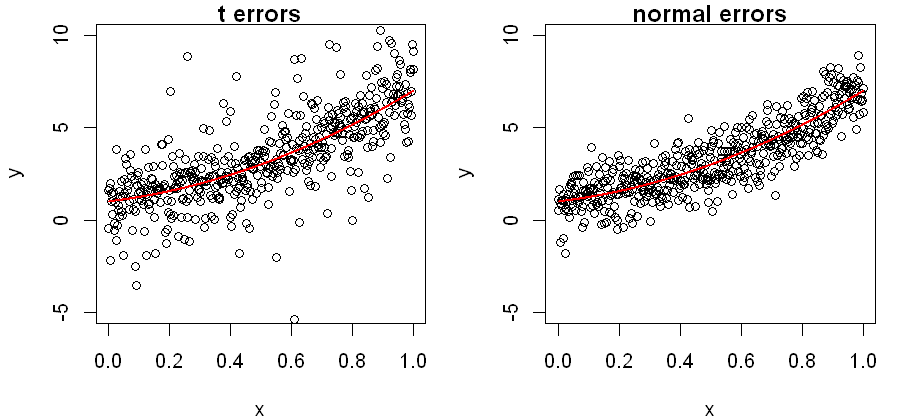

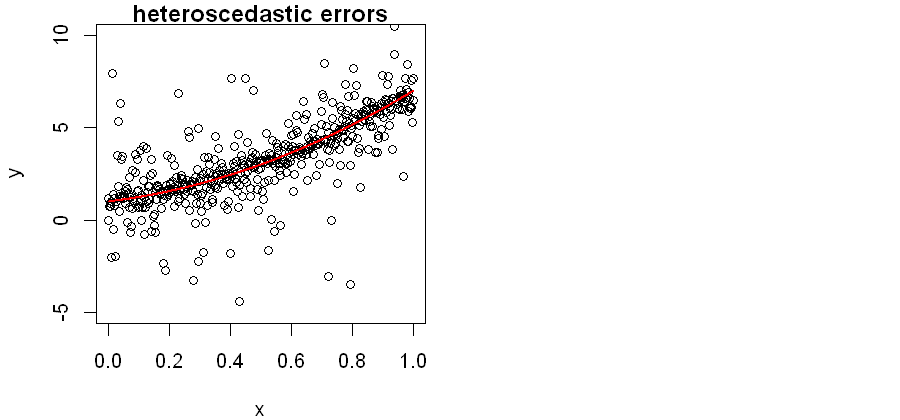

In [36]:
options(repr.plot.width=7.5,repr.plot.height=3.5)
par(mar=c(4,4,1,1),mfcol=c(1,2))
ylim <- c(-5,10)
plot(X[,2],Yt,xlab="x",ylab="y",main="t errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)
plot(X[,2],Yn,xlab="x",ylab="y",main="normal errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)
plot(X[,2],Yw,xlab="x",ylab="y",main="heteroscedastic errors",ylim=ylim)
points(X[,2],X%*%beta,type='l',col='red',lwd=2)

The t distribution produces a lot of outliers (some outliers are not shown because we restricted the y-axis to ylim in each plot) and there are also a lot of outliers in the case of the heteroscedastic errors. Given the data, out goal is to infer the parameters $\beta$. We will mainly consider two methods. The least squares method we discussed in class is
$$ \beta_{LS} = \text{argmin}_{\beta} (y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2)^2 =  \text{argmin}_{\beta} (Y - X\beta)^T(Y - X\beta) = (X^TX)^{-1}X^TY$$
A second possibility is to find the [least absolute deviations](https://en.wikipedia.org/wiki/Least_absolute_deviations) estimator. We call this $\beta_{LAD}$ which has the form
$$\beta_{LAD} = \text{argmin}_{\beta} |y_i - \beta_1 - \beta_2 x_i - \beta_3 x_i^2|.$$
This may also be known as $L_1$ regression or quantile regression with the $0.5$ quantile.

In this homework you will fit both $\beta_{LS}$ and $\beta_{LAD}$ and compare the methods based on parameter estimation accuracy and speed. In the case of the heteroscedastic errors dataset we will also compare to the weighted least squares estimator $\beta_{WLS}= (X^TWX)^{-1}X^TWY$, where $W$ is a diagonal matrix, with the diagonal given by $1/\sigma_i^2$ for $i=1,\dots,n$ (assume that the $\sigma_i$ are known). 

## Question 1

Fixing $X$, generate the $Y^{(t)}$, $Y^{(n)}$, and $Y^{(w)}$ datasets $N=100$ times (note that $n$ is the sample size and $N$ is the number of times we run the simulation). For the  $Y^{(t)}$ and $Y^{(n)}$ datasets, compute $\beta_{LS}$ and $\beta_{LAD}$ each time. Since $\beta$ is a vector of length $3$, this will result in 4 matrices (LS for $Y^{(t)}$ and $Y^{(n)}$ and LAD for $Y^{(t)}$ and $Y^{(n)}$) with $N$ rows and 3 columns (you could store this output in other formats as well, but matrices are convenient). For the $Y^{(w)}$ datasets, compute all three estimators $\beta_{LS}$, $\beta_{LAD}$, and $\beta_{WLS}$, and similarly store them in matrices. 

Make scatterplots of $\beta_2$ versus $\beta_3$ estimates for each data type and each estimator. This will produce seven scatterplots in total. Mark the true $\beta_2$ and $\beta_3$ on each plot and comment of the quality of the estimators in the different settings. Your scatterplots should look similar to the ones below.

**Tips for Fitting** 

- For fitting $\beta_{LS}$, you have many options in R (lm, lm.fit) and python (scipy.linalg.lstsq, sklearn.linear_model.LinearRegression). 
- For fitting $\beta_{LAD}$ in R you can use l1fit from the package L1pack or  rq.fit from quantreg. For fitting $\beta_{LAD}$ in Python the options are somewhat more limited:
    * [statsmodels](http://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html) requires use of pandas, calls the quantreg R package
    * generic optimizer such as [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)   
  The latter is a more general method that will likely be slower. On the other hand, scipy.optimize will also be useful for many other problems. You may also use any other optimizer you find. 
- For fitting $\beta_{WLS}$ in R you can use for example lm.wfit or lsfit (the latter may be more convenient here). In Python you can use for example the sample_weight option in sklearn.linear_model.LinearRegression or statsmodels.regression.linear_model.WLS. 

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaT.png">

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaNorm.png">

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/betaHet.png">

In [37]:
library(L1pack)
n<- 500
N<- 100
X1 <- cbind(x,x^2)
#creating null matrices to store the coefficients of distributions under different conditions for 100 Simulations
ls_yt_coeff <- matrix(0, nrow = N, ncol = 3)
ls_yn_coeff <- matrix(0, nrow = N, ncol = 3)
lad_yt_coeff <- matrix(0, nrow = N, ncol = 3)
lad_yn_coeff <- matrix(0, nrow = N, ncol = 3)
ls_yw_coeff  <- matrix(0,nrow=N,ncol=3) 
lad_yw_coeff <- matrix(0,nrow=N,ncol=3)
wls_yw_coeff <- matrix(0,nrow=N,ncol=3)

for (i in 1:N)
    {
    Yt <- X%*%beta + rt(n,df=2)#t distribution
    Yn <- X%*%beta + rnorm(n)#normal distribution
    Yw <- X%*%beta + rnorm(n,sd=sig)# heterocedastic
    ls_yt <- lm(Yt~X1)#least square for t distribution
    ls_yt_coeff[i,]<- ls_yt$coefficients
    ls_yn <- lm(Yn~X1)#least square for normal distribution
    ls_yn_coeff[i,]<- ls_yn$coefficients
    lad1 <- l1fit(X1, Yt)#lad for t distribution
    lad_yt_coeff[i,] <- lad1$coefficients
    lad2 <- l1fit(X1, Yn)#lad for normal distribution
    lad_yn_coeff[i,] <- lad2$coefficients
    ls_yw <- lm(Yw~X1)#least square for heterocedastic 
    ls_yw_coeff[i,]<- ls_yw$coefficients
    lad_yw <- l1fit(X1, Yw)#lad for heterocedastic 
    lad_yw_coeff[i,]<- lad_yw$coefficients
    wls_yw<- lsfit(X1, Yw)#weighted least square for heterocedastic 
    wls_yw_coeff[i,]<- wls_yw$coefficients
}

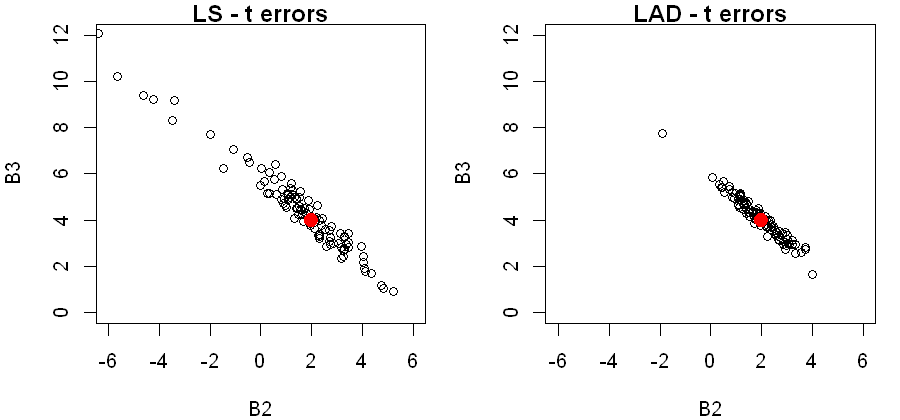

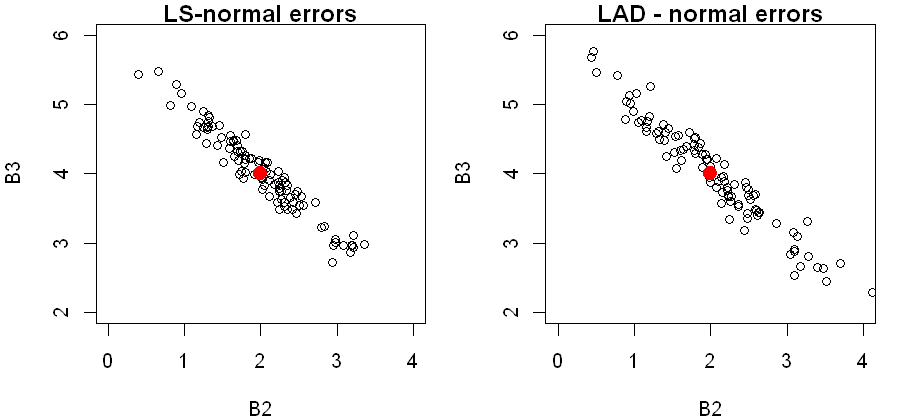

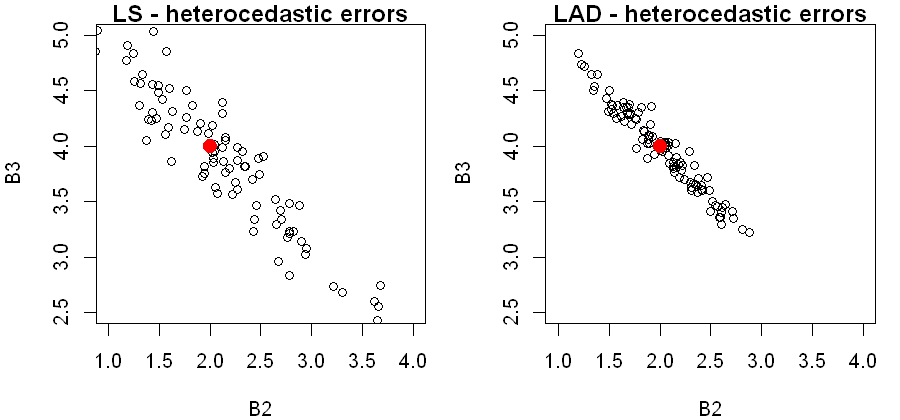

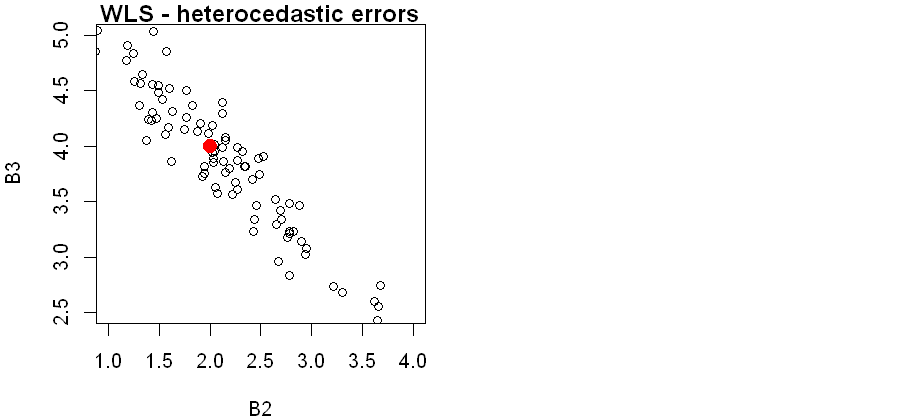

In [38]:
par(mar=c(4,4,1,1),mfcol=c(1,2))
ylim_t <- c(0,12)
xlim_t <- c(-6,6)
ylim_n <- c(2,6)
xlim_n <- c(0,4)
ylim_h <- c(2.5,5)
xlim_h <- c(1,4)
plot(ls_yt_coeff[,2],ls_yt_coeff[,3],xlab="B2",ylab="B3",main="LS - t errors",xlim=xlim_t,ylim=ylim_t)
points(2, 4,type='p',col='red', cex= 1.5, pch=19)
plot(lad_yt_coeff[,2],lad_yt_coeff[,3],xlab="B2",ylab="B3",main="LAD - t errors",xlim=xlim_t,ylim=ylim_t)
points(2, 4,type='p',col='red', cex= 1.5, pch=19)
plot(ls_yn_coeff[,2],ls_yn_coeff[,3],xlab="B2",ylab="B3",main="LS-normal errors",xlim=xlim_n,ylim=ylim_n)
points(2, 4,type='p',col='red', cex= 1.5, pch=19)
plot(lad_yn_coeff[,2],lad_yn_coeff[,3],xlab="B2",ylab="B3",main="LAD - normal errors",xlim=xlim_n,ylim=ylim_n)
points(2, 4,type='p',col='red', cex= 1.5, pch=19)
plot(ls_yw_coeff[,2],ls_yw_coeff[,3],xlab="B2",ylab="B3",main="LS - heterocedastic errors",xlim=xlim_h,ylim=ylim_h)
points(2, 4,type='p',col='red', cex= 1.5, pch=19)
plot(lad_yw_coeff[,2],lad_yw_coeff[,3],xlab="B2",ylab="B3",main="LAD - heterocedastic errors",xlim=xlim_h,ylim=ylim_h)
points(2, 4,type='p',col='red', cex= 1.5, pch=19)
plot(wls_yw_coeff[,2],wls_yw_coeff[,3],xlab="B2",ylab="B3",main="WLS - heterocedastic errors",xlim=xlim_h,ylim=ylim_h)
points(2, 4,type='p',col='red', cex= 1.5, pch=19)

## Question 2

Compare the speed of $\beta_{LS}$ to $\beta_{LAD}$ using a package such as microbenchmark in R or equivalent tools, such as %timeit, in Python, see [this section of the textbook](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html). Empirically determine the computational complexity (in $n$) of $\beta_{LAD}$ and $\beta_{LS}$ (we know from theoretical analysis that $\widehat{\beta}_{LS}$ should be linear in $n$). Provide a plot to summarize your findings.

In [39]:
library(microbenchmark)#using microbenchmark to compute the speed for each model
time<- microbenchmark("Yt_B_LS" = {for(i in 1:N){lm(Yt~X1)}},
                      "Yn_B_LS" = {for(i in 1:N){lm(Yn~X1)}},
                      "Yt_B_LAD" = {for(i in 1:N){l1fit(X1,Yt)}},
                      "Yn_B_LAD" = {for(i in 1:N){l1fit(X1,Yn)}},
                      "Yw_B_LS" =  {for(i in 1:N){lm(Yw~X1)}},
                      "Yw_B_LAD"= {for(i in 1:N){l1fit(X1,Yw)}},
                      "Yw_B_WLS"= {for(i in 1:N){lsfit(X1,Yw)}})
summary(time)

expr,min,lq,mean,median,uq,max,neval
Yt_B_LS,70.410701,73.51625,82.37087,74.45470,77.56285,239.2476,100
Yn_B_LS,69.936501,73.59185,78.67242,74.38310,76.09800,207.1269,100
Yt_B_LAD,27.994101,28.74435,32.30444,29.15240,31.18705,77.8799,100
Yn_B_LAD,32.733501,33.30045,36.32382,33.69580,35.97045,83.7550,100
Yw_B_LS,69.869001,73.58440,79.80742,74.37435,76.12065,224.6686,100
Yw_B_LAD,30.621400,31.39505,37.26841,31.77120,34.50390,100.8861,100
Yw_B_WLS,9.671902,10.01680,11.59403,10.23875,10.99210,33.3836,100


In [40]:
ns<- 2^(10:13)#sample size
time<- matrix(0,nrow=4,ncol=7)
for(ii in 1:length(ns)){
    x <- seq(from=0,to=1,length.out=ns[ii])
    X <- cbind(1,x,x^2)
    X1<- cbind(x,x^2)
    beta <- matrix(c(1,2,4),nrow=3)
    Yt <- X%*%beta + rt(ns[ii],df=2)
    Yn <- X%*%beta + rnorm(ns[ii])
    sig <- 0.1 + rexp(ns[ii]) 
    Yw <- X%*%beta + rnorm(ns[ii],sd=sig)
    time[ii,]<- summary(microbenchmark(lm(Yt~X1),lm(Yn~X1),l1fit(X1,Yt),l1fit(X1,Yn),lm(Yw~X1),l1fit(X1,Yw),
                                       lsfit(X1,Yw)))$median}#median time from summary is stored in time matrix

In [42]:
ns<- 2^(10:13)
#storing the corresponding values from the time matrix
yt_ls <- time[,1]
yn_ls <- time[,2]
yt_lad <- time[,3]
yn_lad <- time[,4]
yw_ls <- time[,5]
yw_lad <- time[,6]
yw_wls<- time[,7]

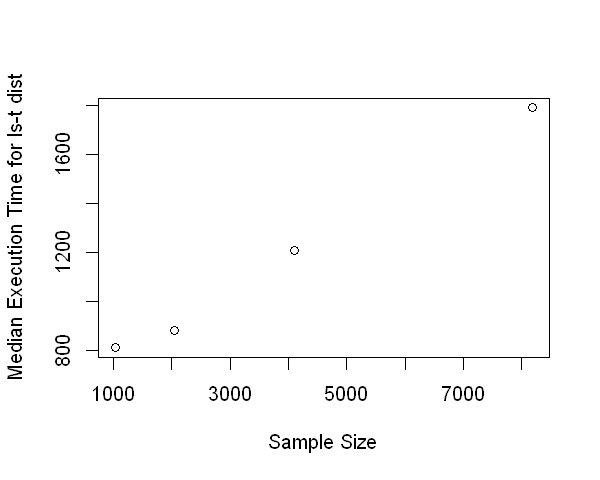

In [52]:
options(repr.plot.height=4,repr.plot.width=5)
plot(ns,yt_ls,xlab="Sample Size",ylab="Median Execution Time for ls-t dist")

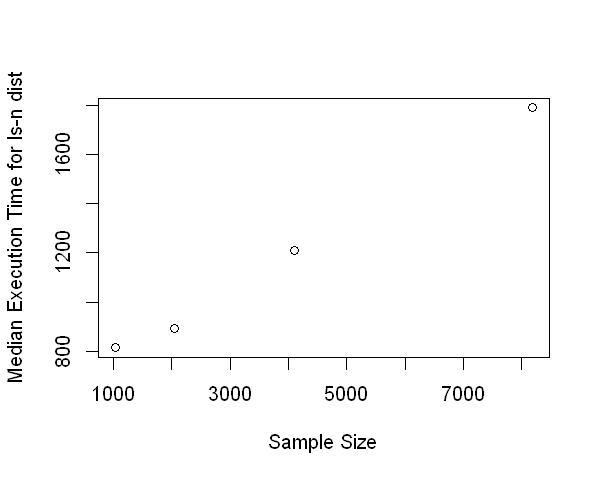

In [53]:
options(repr.plot.height=4,repr.plot.width=5)
plot(ns,yn_ls,xlab="Sample Size",ylab="Median Execution Time for ls-n dist")

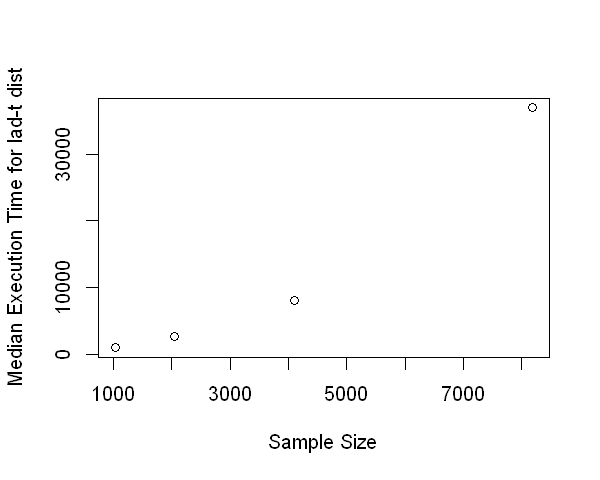

In [54]:
options(repr.plot.height=4,repr.plot.width=5)
plot(ns,yt_lad,xlab="Sample Size",ylab="Median Execution Time for lad-t dist")

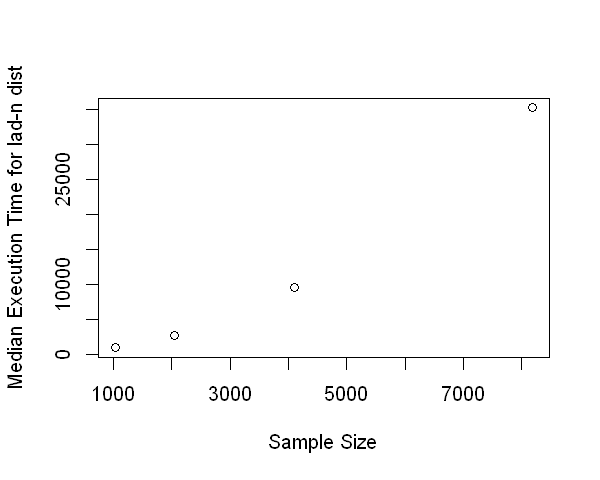

In [55]:
options(repr.plot.height=4,repr.plot.width=5)
plot(ns,yn_lad,xlab="Sample Size",ylab="Median Execution Time for lad-n dist")

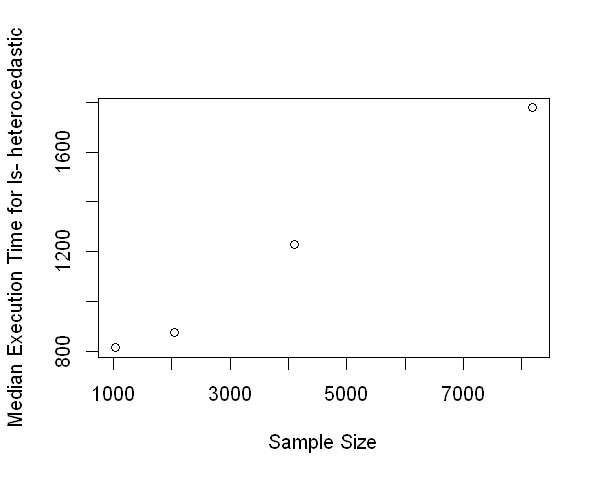

In [56]:
options(repr.plot.height=4,repr.plot.width=5)
plot(ns,yw_ls,xlab="Sample Size",ylab="Median Execution Time for ls- heterocedastic")

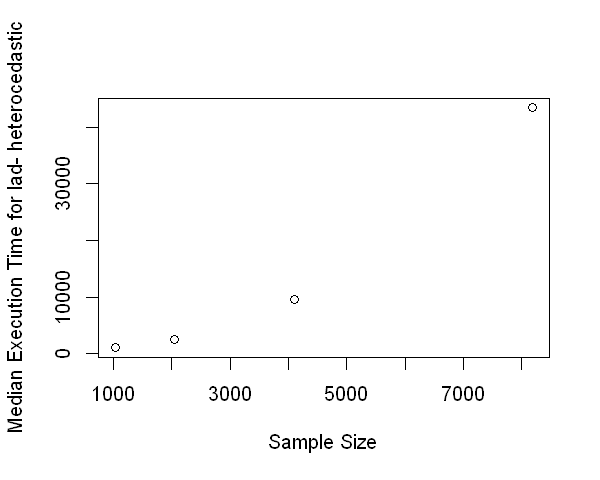

In [57]:
options(repr.plot.height=4,repr.plot.width=5)
plot(ns,yw_lad,xlab="Sample Size",ylab="Median Execution Time for lad- heterocedastic")

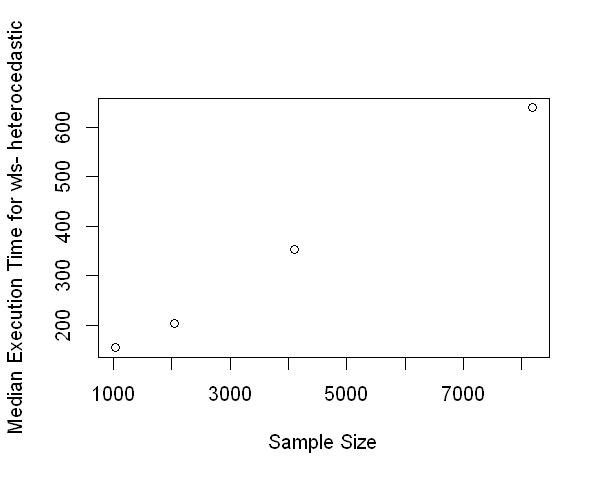

In [58]:
options(repr.plot.height=4,repr.plot.width=5)
plot(ns,yw_wls,xlab="Sample Size",ylab="Median Execution Time for wls- heterocedastic")